## AIM:-
This case requires trainees to develop a model for predicting customer churn at a
fictitious wireless telecom company and use insights from the model to develop an
incentive plan for enticing would-be churners to remain with company.
Data for the case are available in csv format.
The data are a scaled down version of the full database generously donated by an
anonymous wireless telephone company.
There are still 7043 customers in the database, and 20 potential predictors.
Candidates can use whatever method they wish to develop their machine learning model.
The data are available in one data file with 7043 rows that combines the calibration and
validation customers. “calibration” database consisting of 4000 customers and a
“validation” database consisting of 3043 customers.
Each database contained (1) a “churn” variable signifying whether the customer had left
the company two months after observation, and (2) a set of 20 potential predictor
variables that could be used in a predictive churn model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data.
This case requires both statistical analysis and creativity/judgment. I recommend you
spend much time on both fine-tuning and interpreting results of your machine learning
model

In [1]:
## importing files into colab
from google.colab import files
files.upload()

{}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
import scikitplot as splt

In [3]:
df=pd.read_csv("Churn.csv")
df.head() #printing first five rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

In [4]:
df.shape   #number orf rows and column present in dataset

(7043, 21)

In [5]:
df.columns  #printing the column index present in dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes   #data type of each and every individual column

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().values.any()   #is there any null values present in dataset

False

In [8]:
#let's cross check the presence of null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#statistical description of numerical column present in dataset
stats_num=df.describe()
stats_num.T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


As we see the statistical description we can say that there is large variations of minimum and maximum value for features tenure and MonthlyCharges.

In [10]:
#description of categorical column present in dataset
cat_des=df.dtypes[df.dtypes=="object"].describe()
cat_des

count         18
unique         1
top       object
freq          18
dtype: object

Here we have total 18 categorical features present in dataset

## Exploratory Data analysis

In [11]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


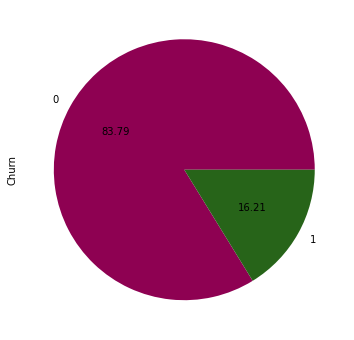

In [12]:
#how senior citizen affecting the termination of plan
plt.figure(figsize=(8,6))
df.groupby(["SeniorCitizen"])["Churn"].count().plot(kind="pie",autopct="%0.2f",cmap='PiYG')
plt.show()

16.21 percent of senior citzen is terminating their service

In [13]:
#mapping the target class into numerical variable
df["Churn"]=df["Churn"].map({"No":0,"Yes":1})

<Figure size 576x432 with 0 Axes>

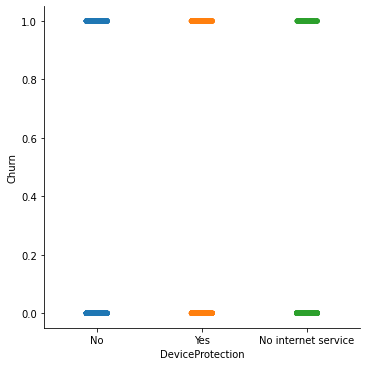

In [14]:
plt.figure(figsize=(8,6))
sns.catplot(x="DeviceProtection",y="Churn",data=df,cmap='PiYG',dodge=True)
plt.show()

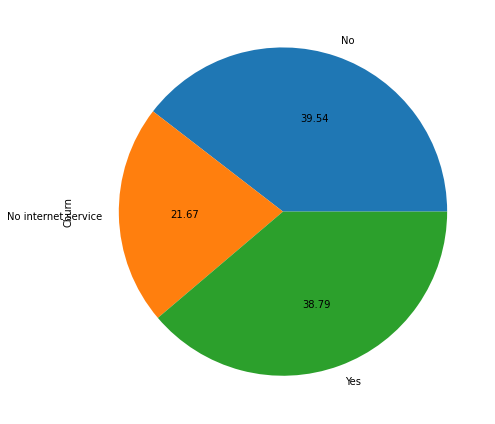

In [15]:
plt.figure(figsize=(8,6))
df.groupby(["StreamingMovies"])["Churn"].size().plot(kind="pie",autopct="%0.2f")
plt.tight_layout()
plt.show()

There are three categories of people present for a specific service provider <br>
1.21.67% People don't have internet connection <br>
2.39.54% People have internet service but they prefer not to stream <br>
3.38.97% People have internet connection and they prefer streming <br>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


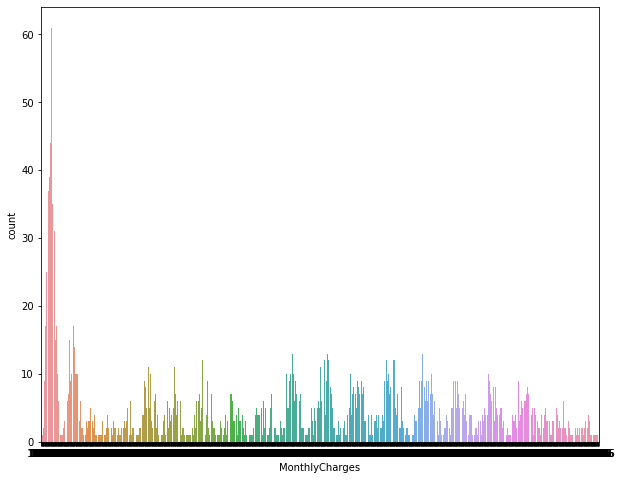

In [16]:
plt.figure(figsize=(10,8))
sns.countplot("MonthlyCharges",data=df,orient="V")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


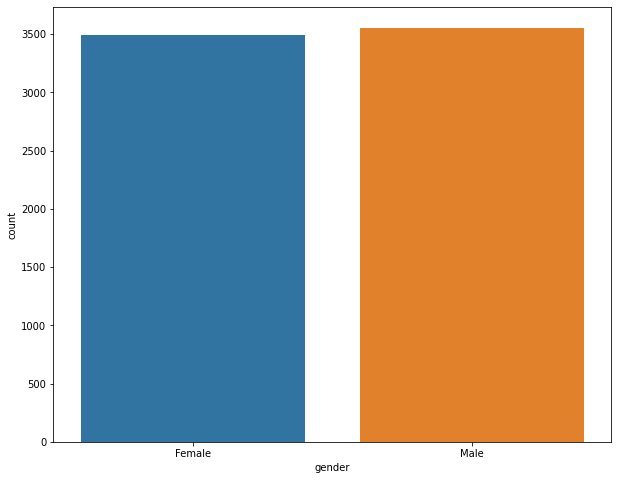

In [17]:
plt.figure(figsize=(10,8))
sns.countplot("gender",data=df)
plt.show()

There are almost equal amount of male and female customer are using the services from given dervice provider

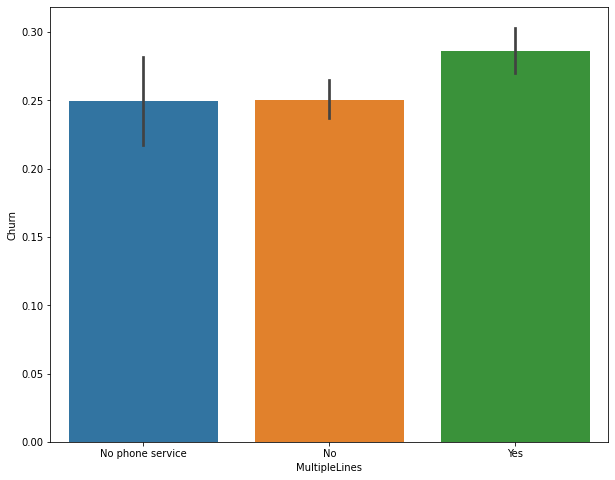

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x="MultipleLines",y="Churn",data=df)
plt.show()

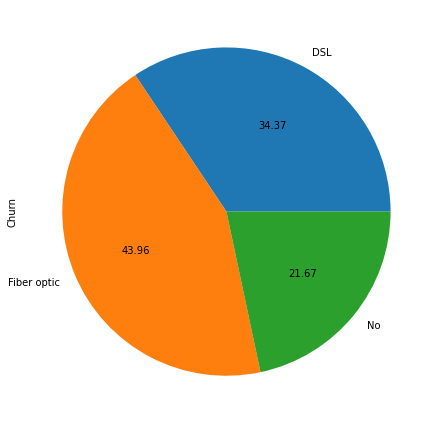

In [19]:
plt.figure(figsize=(8,6))
df.groupby(["InternetService"])["Churn"].count().plot(kind="pie",autopct="%0.2f")
plt.tight_layout()
plt.show()

1. 34.37 percent of people rely on Router based internet services
2. 43.96 percent of people rely on optical fiber
3. 21.67 percent of people don't use the internet service from operator

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


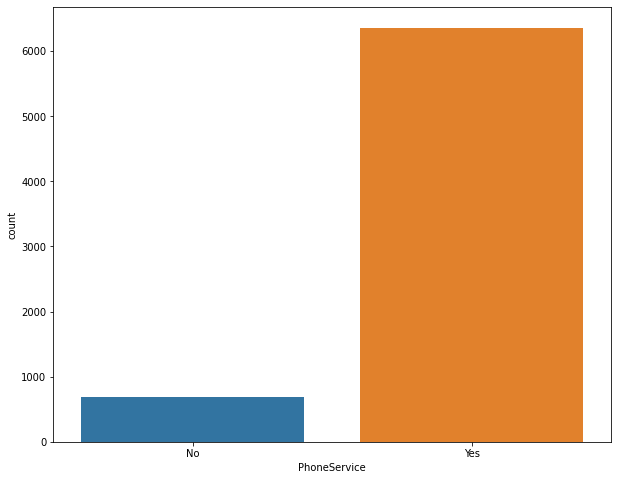

In [20]:
plt.figure(figsize=(10,8))
sns.countplot("PhoneService",data=df)
plt.show()

Less than 1000 people are not using the telephone service from the service provider and a large bunch of people more than 6000 is using the telephone service

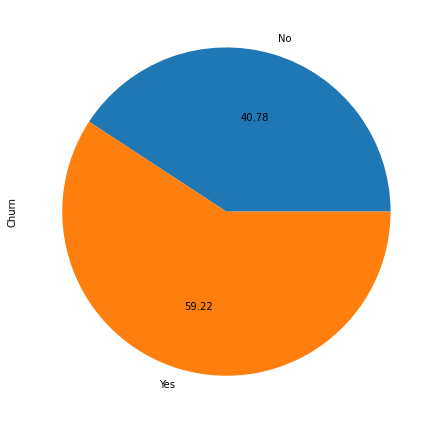

In [21]:
plt.figure(figsize=(8,6))
df.groupby(["PaperlessBilling"])["Churn"].count().plot(kind="pie",autopct="%0.2f")
plt.tight_layout()
plt.show()

approxiamtely 60% of people prefer to go for paperless billiing

## Feature Engineering

Why we need it ?
we need to convert all the categorical feature into numerical variables as we know machine can only understand numeric values.Hence in this section we will convert the categorical features into numerical  features.

In [22]:
cat_df={}
for i in df.columns:
  if df[i].dtypes=="object":
    cat_df[i]=len(df[i].unique())
cat_df

{'Contract': 3,
 'Dependents': 2,
 'DeviceProtection': 3,
 'InternetService': 3,
 'MultipleLines': 3,
 'OnlineBackup': 3,
 'OnlineSecurity': 3,
 'PaperlessBilling': 2,
 'Partner': 2,
 'PaymentMethod': 4,
 'PhoneService': 2,
 'StreamingMovies': 3,
 'StreamingTV': 3,
 'TechSupport': 3,
 'TotalCharges': 6531,
 'customerID': 7043,
 'gender': 2}

Here Except customerID,TotalCharges all the features are having categorical variable at max hence we will apply label encoding to all those columns

In [23]:
from sklearn.preprocessing import LabelEncoder
cat_list=list(cat_df.keys())
list_features=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
encoder=LabelEncoder()
for i in list_features:
    df[i]=encoder.fit_transform(df[i])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

Let's convert the remaining feature with categorical variable into numerical variables using mean value encoding

In [25]:
cat_df=df[["customerID","TotalCharges","Churn"]]
cat_df.head()

,customerID,TotalCharges,Churn
0,7590-VHVEG,29.85,0
1,5575-GNVDE,1889.5,0
2,3668-QPYBK,108.15,1
3,7795-CFOCW,1840.75,0
4,9237-HQITU,151.65,1


In [26]:
for i in cat_df.columns:
  if i!="Churn":
    mean_df=cat_df.groupby([i])["Churn"].mean()
    cat_df[i]=cat_df[i].map(mean_df)
cat_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,customerID,TotalCharges,Churn
0,0,0.0,0
1,0,0.0,0
2,1,1.0,1
3,0,0.0,0
4,1,1.0,1


In [27]:
df=df.drop(["customerID","TotalCharges","Churn"],axis=1)
df=pd.concat([df,cat_df],axis=1).reset_index(drop=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,customerID,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0,0.0,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0,0.0,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1,1.0,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0,0.0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1,1.0,1


In [28]:
df.dtypes  #checking whether our all feature is converted into numerical variable or not

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
customerID            int64
TotalCharges        float64
Churn                 int64
dtype: object

In [29]:
df.isnull().values.any()   #checking for null values

False

#visualizing data after encoding 

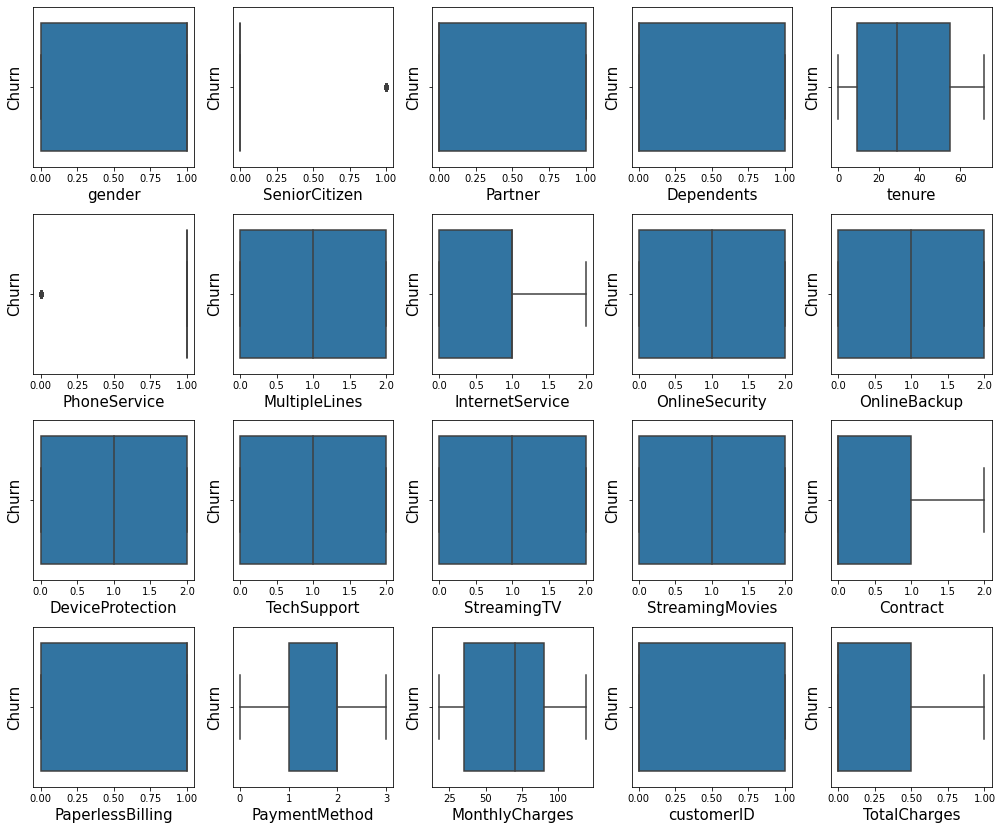

In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(14,14))
j=1
for i in df.columns:
  if j<=len(df.columns):
    if i!="Churn":
      plt.subplot(5,5,j)
      sns.boxplot(df[i])
      plt.xlabel(i,fontsize=15)
      plt.ylabel("Churn",fontsize=15)
  j+=1
plt.tight_layout()
plt.show()

As we see the data is not crossing the Upper and lower whisker of boxplot hence we can say that there is almost null or negligible amount of outliers present in dataset

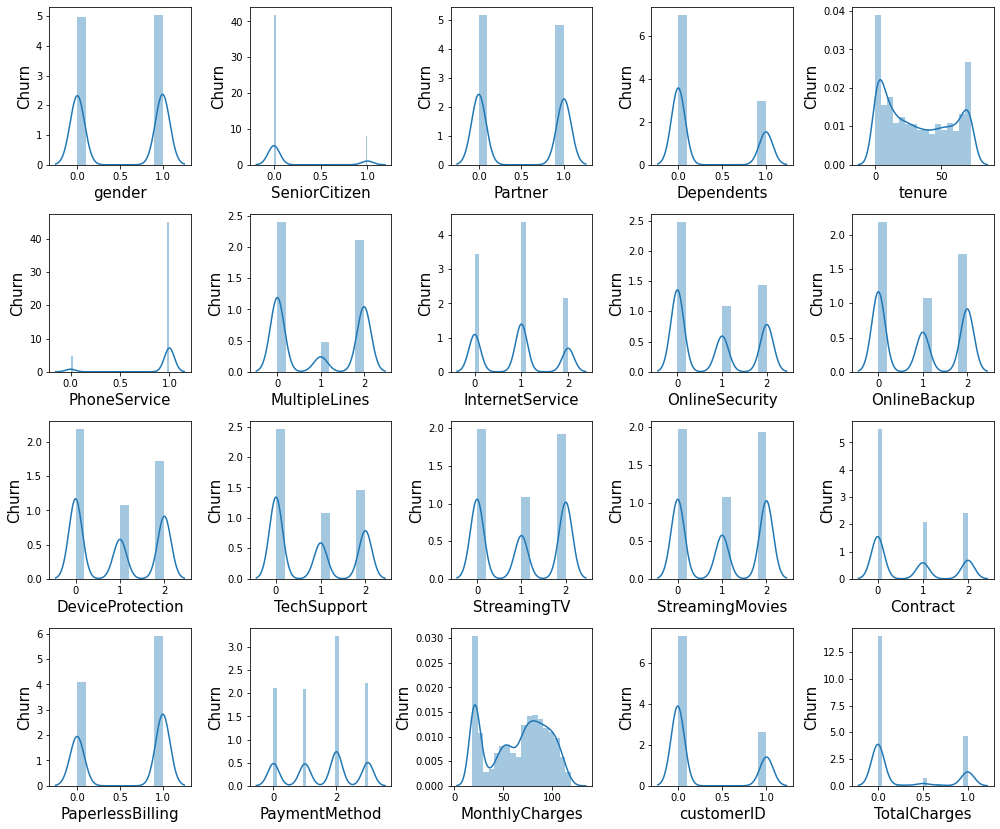

In [31]:
#let's check the distribution of the data 
plt.figure(figsize=(14,14))
j=1
for i in df.columns:
  if j<=len(df.columns):
    if i!="Churn":
      plt.subplot(5,5,j)
      sns.distplot(df[i])
      plt.xlabel(i,fontsize=15)
      plt.ylabel("Churn",fontsize=15)
  j+=1
plt.tight_layout()
plt.show()

Here dataset is almost gaussian distributed


#checking Multicolinearity

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(data):
    x=data.iloc[:,:-1]
    x_scaled=scaler.fit_transform(x)
    vif=pd.DataFrame()
    vif["Features"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
    return vif
VIF(df)

,Features,VIF
0,gender,1.001834
1,SeniorCitizen,1.152125
2,Partner,1.461873
3,Dependents,1.382982
4,tenure,2.859085
5,PhoneService,1.634371
6,MultipleLines,1.392759
7,InternetService,1.838669
8,OnlineSecurity,1.259765
9,OnlineBackup,1.192150


If we have vif values greater than 10 then those features will be highly correlated and we need to remove one column out oif them

In [34]:
df_final=df.drop(["customerID"],axis=1)
VIF(df_final)

,Features,VIF
0,gender,1.001775
1,SeniorCitizen,1.151909
2,Partner,1.460970
3,Dependents,1.382981
4,tenure,2.858879
5,PhoneService,1.634365
6,MultipleLines,1.392616
7,InternetService,1.838565
8,OnlineSecurity,1.259233
9,OnlineBackup,1.189605


Yes we are sucessfully able to remove the multicolinearity from the dataset

## Pre Modeling Steps

Churn
0    5174
1    1869
dtype: int64


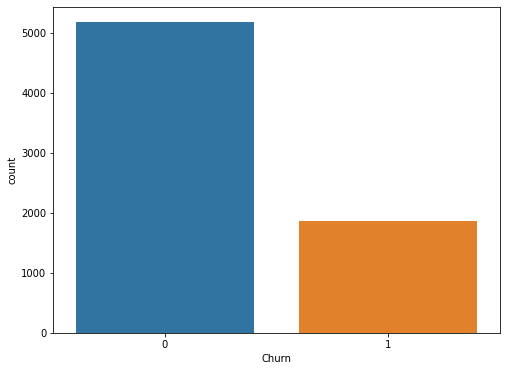

In [41]:
#checking whether our dataset is balanced or not
plt.figure(figsize=(8,6))
print(df_final.groupby(["Churn"]).size())
sns.countplot(df["Churn"])
plt.show()

As we see our dataset is imbalance hence we need to balance it .I am RandomOverSampler to upsamle the dataset

In [104]:
from imblearn.over_sampling import RandomOverSampler
x=df_final.iloc[:,:-1]
y=df_final.iloc[:,-1]
over_sample=RandomOverSampler()
x_res,y_res=over_sample.fit_sample(x,y)
print(x_res.shape,y_res.shape)

(10348, 19) (10348,)


In [48]:
df_res=pd.DataFrame(x_res,columns=x.columns)
df_res["Churn"]=y_res
df_res.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,0.0,0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.0,0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,1.0,1
3,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.0,0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,1.0,1


In [56]:
x_train,x_test,y_train,y_test=train_test_split(df_res.iloc[:,:-1],df_res.iloc[:,-1],test_size=0.29,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7347, 19)
(7347,)
(3001, 19)
(3001,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
models=[]
models.append(('CART', DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("XGBOOST", XGBClassifier()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC(kernel="linear")))
names=[]
result=[]
for name,model in models:
    k_fold=KFold(n_splits=10,shuffle=True,random_state=7)
    score=cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

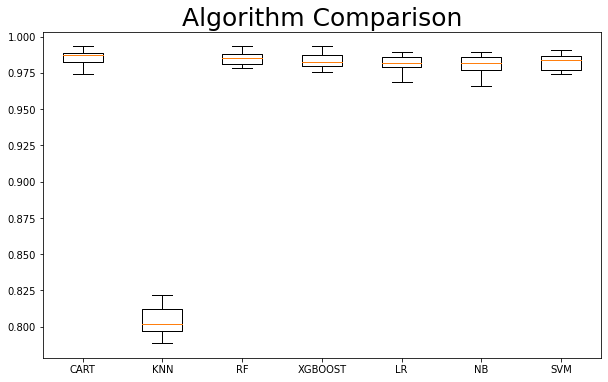

In [68]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

As we see Linear model is giving very high accuracy with less variations hence we will go with Logistic Regression

In [69]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
predicted=model.predict(x_test)
predicted

array([1, 0, 0, ..., 0, 1, 1])

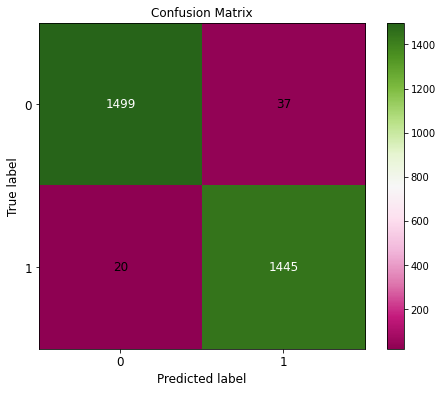

[[1499   37]
 [  20 1445]]


In [79]:
splt.metrics.plot_confusion_matrix(y_test,predicted,figsize=(8,6),cmap="PiYG",text_fontsize="large")
plt.show()
con_mat=confusion_matrix(y_test,predicted)
print(con_mat)

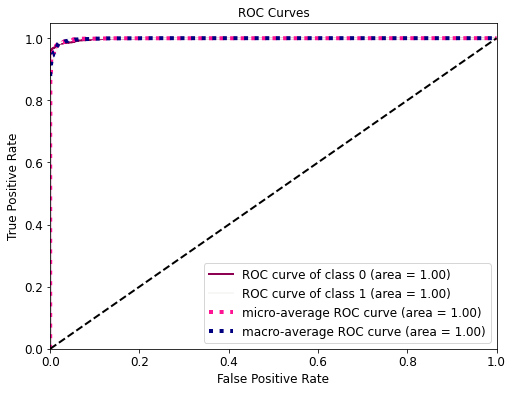

In [84]:
pred_probab=model.predict_proba(x_test)
splt.metrics.plot_roc_curve(y_test,pred_probab,figsize=(8,6),cmap="PiYG",text_fontsize="large")
plt.show()

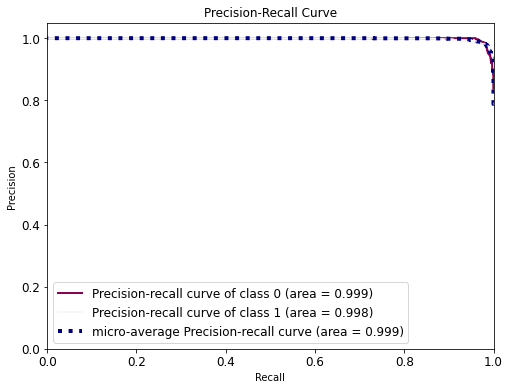

In [85]:
pred_probab=model.predict_proba(x_test)
splt.metrics.plot_precision_recall(y_test,pred_probab,figsize=(8,6),cmap="PiYG",text_fontsize="large")
plt.show()

## Final Step

In [99]:
Result=pd.DataFrame({"Actual":y_test,"Predicted":predicted})
result=Result.head(20)
result

,Actual,Predicted
7370,1,1
3903,0,0
2793,0,0
1988,1,1
2106,0,0
10325,1,1
8312,1,1
286,0,0
5129,0,0
1806,0,0


<Figure size 864x720 with 0 Axes>

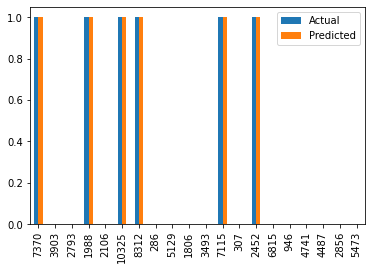

In [100]:
plt.figure(figsize=(12,10))
result.plot(kind="bar")
plt.show()

## checking the result on test dataset

In [109]:
test_result=model.predict([[ 0.,    0.,    1.,    0.  ,  1.  ,  0.,    1. ,   0.   , 0.  ,  2. ,   0. ,   0., 0.  ,  0.,    0.  ,  1.,    2. ,  29.85 , 0.  ]])
print(test_result)

[0]
